In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [111]:
def logisticalMap(a,R):
    b=R * a*(1-a)#(u*m)*(1-m)
    return b
def BifurcationPlot(rList,xList,m,l):
    assert(len(rList)== len(xList))
    plt.plot(rList,xList, ls='', marker='.',markersize=.1)
    title="X vs R Bifurcation Graph X_0=.2, Displaying " + str(m)+ " iterates(excluding L="+str(l) +" iterations)"
    plt.title(title)
    plt.ylabel("X_n")
    plt.xlabel("R")
    plt.show()
def FeigenbaumRverseBifurcation(x,y):
    fig, ax = plt.subplots()
    ax.plot(x,y, ls='', marker='.',markersize=.1,color='coral')
    title="R vs Bifurcation(2^n)"
    plt.title(title)
    plt.ylabel("2^n cycle")
    plt.xlabel("R_n")
    #set lines to display approximate 2^n cycles 
    r1 = ax.axvline(x=[3.0],color="cyan",linewidth=.4) 
    r2 =ax.axvline(x=[3.45],color="lawngreen",linewidth=.4)
    r3 =ax.axvline(x=[3.542],color="teal",linewidth=.4)
    r4 =ax.axvline(x=[3.565],color="olive",linewidth=.4)
    r5 =ax.axvline(x=[3.57],color="magenta",linewidth=.4)
    #
    labels=["r1(2^1)","r2(2^2)","r3(2^3)","r4(2^4)","r5(2^5)"]
    #handles, _ = ax.get_legend_handles_labels()
    plt.legend(handles = [r1,r2,r3,r4,r5], labels = labels, loc='center right')
    plt.show()
# will set initial x=.2, m-# of iterates showing,d= amt of numbers btw interval of R values 2.8-4, l-reduce by number l points (to get rid of transcient)
def runLogisticalMap(l,m,d,x0=.2):
    rList= []
    xList = []
    rRange = np.linspace(2.8,4,d)
    totalIterates= l+m
    
    feigenbuamRList = []
    bifurcationList=[]
    for r in rRange:
        #print("Running Logistical Map for R=",r," m=",m, " x_0=",x)
        

        x=x0
        xSubList=[]
        for i in range(totalIterates):
            if(i>=l): #cut off transcient here...
                rList.append(r)
                xList.append(x)
                xSubList.append(x)
       
            x= logisticalMap(x,r)
        xSubList = [round(ele,4) for ele in xSubList]
        xSubListUnique = np.unique(xSubList)
        n_Cycle= len(xSubListUnique)
        #print(r, xSubListUnique, n_Cycle)  #----uncomment for specific r values

        feigenbuamRList.append(r)
        bifurcationList.append(n_Cycle)
        
    FeigenbaumRverseBifurcation(feigenbuamRList,bifurcationList)
    BifurcationPlot(rList,xList,m,l)

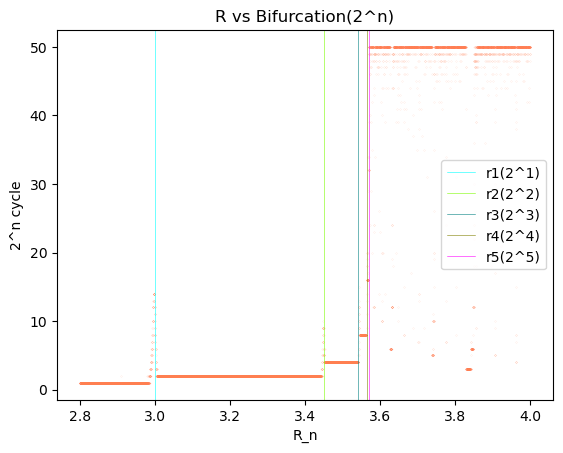

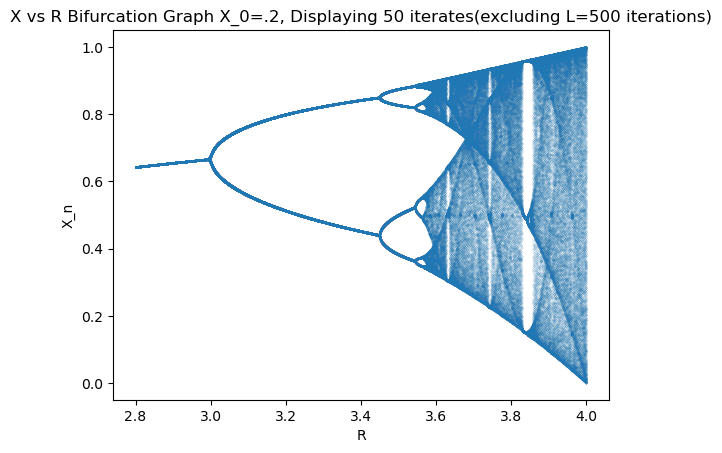

In [112]:
runLogisticalMap(500,50,10000)

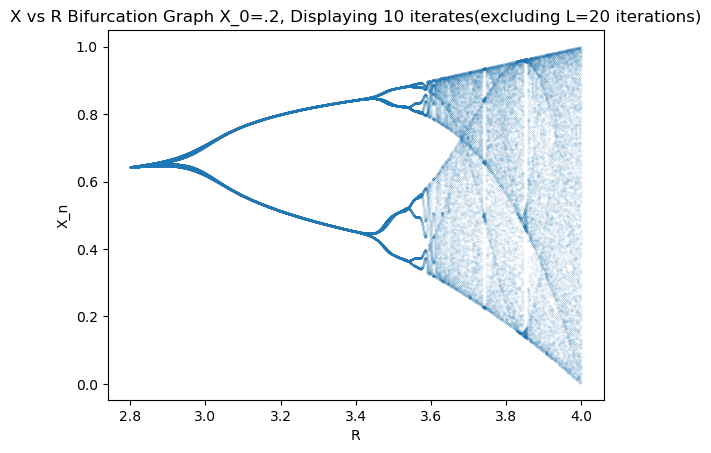

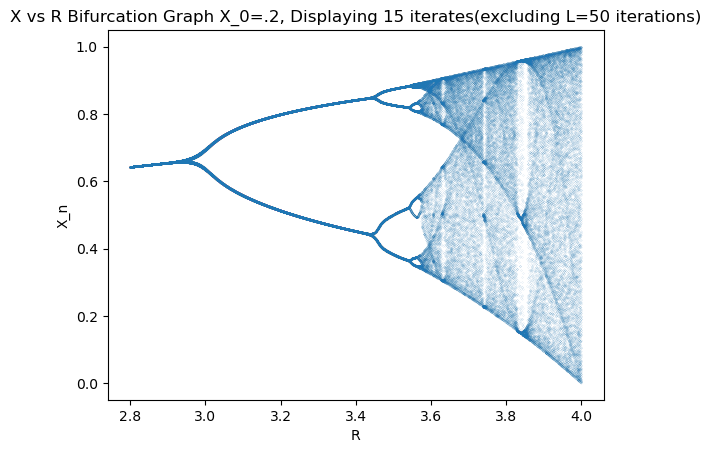

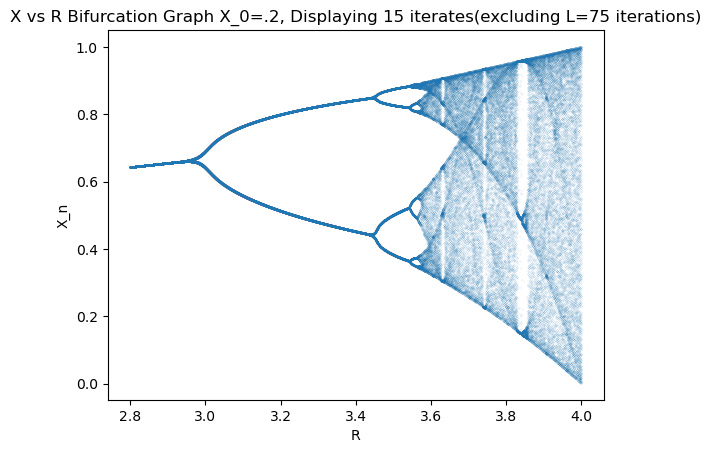

In [6]:
runLogisticalMap(20,10,10000)
runLogisticalMap(50,15,10000)
runLogisticalMap(75,15,10000)

In [245]:
rValues = [3.0,3.45,3.542,3.565,3.57]
def calcDiff(x_n,x_nMinus,x_nPlus):
    ans= (x_n-x_nMinus)/(x_nPlus - x_n)
    return ans
diffList=[]
for i in range(1,len(rValues)-1):
    x_nMinus= rValues[i-1]
    x_n= rValues[i]
    x_nPlus= rValues[i+1]
    diff = calcDiff(x_n,x_nMinus,x_nPlus)
    print("rValues[i] - ", diff)
    diffList.append(diff)


rValues[i] -  4.891304347826108
rValues[i] -  3.9999999999999614
rValues[i] -  4.600000000000124


In [248]:
def logisticalMap(a,R):
    b=R * a*(1-a)#(u*m)*(1-m)
    return b
def HenonMap(x_n,y_n,a, b= .3):
    x_n1= y_n+ 1- a*x_n**2
    y_n1 = b * x_n
    return (x_n1,y_n1)
def BifurcationPlot_Henon(rList,xList,m,l,var):
    assert(len(rList)== len(xList))
    plt.plot(rList,xList, ls='', marker='.',markersize=.1)
    title="a vs "+str(var)+" Bifurcation Graph X_0=0,y_0=0, Displaying " + str(m)+ " iterates(excluding L="+str(l) +" iterations)"
    plt.title(title)
    plt.ylabel(var)
    plt.xlabel("a")
    plt.show()
def FeigenbaumRverseBifurcation_Henon(x,y):
    fig, ax = plt.subplots()
    ax.plot(x,y, ls='', marker='.',markersize=.1,color='coral')
    title="A vs Bifurcation(2^n)"
    plt.title(title)
    plt.ylabel("2^n cycle")
    plt.xlabel("a_n")
    #set lines to display approximate 2^n cycles 
    r1 = ax.axvline(x=[.367],color="cyan",linewidth=.4) 
    r2 =ax.axvline(x=[.91],color="lawngreen",linewidth=.4)
    r3 =ax.axvline(x=[1.025],color="teal",linewidth=.4)
    r4 =ax.axvline(x=[1.05],color="olive",linewidth=.4)
    r5 =ax.axvline(x=[1.055],color="magenta",linewidth=.4)
    #
    labels=["a1(2^1)","a2(2^2)","a3(2^3)","a4(2^4)","a5(2^5)"]
    #handles, _ = ax.get_legend_handles_labels()
    plt.legend(handles = [r1,r2,r3,r4,r5], labels = labels, loc='center right')
    plt.show()
# will set initial x=.2, m-# of iterates showing,d= amt of numbers btw interval of R values 2.8-4, l-reduce by number l points (to get rid of transcient)
def runHenonMap(l,m,d,x0=0,y0=0):
    aList= []
    xList = []
    yList=[]
    aRange = np.linspace(0,1.4,d)
    totalIterates= l+m
    
    feigenbuamAList = []
    bifurcationList=[]
    for a in aRange:
        #print("Running Logistical Map for R=",r," m=",m, " x_0=",x)
        

        x=x0
        y=x0
        xSubList=[]
        ySubList=[]
        for i in range(totalIterates):
            if(i>=l): #cut off transcient here...
                aList.append(a)
                xList.append(x)
                yList.append(y)
                xSubList.append(x)
                ySubList.append(y)
       
            x,y = HenonMap(x,y,a)
        xSubList = [round(ele,4) for ele in xSubList]
        xSubListUnique = np.unique(xSubList)
        n_CycleX= len(xSubListUnique)
        print(a, xSubListUnique, n_CycleX)

        feigenbuamAList.append(a)
        bifurcationList.append(n_CycleX)
        
    FeigenbaumRverseBifurcation_Henon(feigenbuamAList,bifurcationList)
    BifurcationPlot_Henon(aList,xList,m,l,"X")
    BifurcationPlot_Henon(aList,yList,m,l,"Y")

0.0 [1.4286] 1
0.00014001400140014 [1.4282] 1
0.00028002800280028 [1.4278] 1
0.00042004200420042 [1.4273] 1
0.00056005600560056 [1.4269] 1
0.0007000700070007 [1.4265] 1
0.00084008400840084 [1.4261] 1
0.0009800980098009801 [1.4257] 1
0.00112011201120112 [1.4253] 1
0.00126012601260126 [1.4249] 1
0.0014001400140014 [1.4245] 1
0.00154015401540154 [1.4241] 1
0.00168016801680168 [1.4237] 1
0.00182018201820182 [1.4233] 1
0.0019601960196019602 [1.4229] 1
0.0021002100210021 [1.4225] 1
0.00224022402240224 [1.4221] 1
0.00238023802380238 [1.4217] 1
0.00252025202520252 [1.4213] 1
0.0026602660266026603 [1.4209] 1
0.0028002800280028 [1.4205] 1
0.00294029402940294 [1.4201] 1
0.00308030803080308 [1.4197] 1
0.00322032203220322 [1.4193] 1
0.00336033603360336 [1.4189] 1
0.0035003500350035003 [1.4185] 1
0.00364036403640364 [1.4181] 1
0.00378037803780378 [1.4177] 1
0.0039203920392039205 [1.4173] 1
0.00406040604060406 [1.4169] 1
0.0042004200420042 [1.4165] 1
0.00434043404340434 [1.4161] 1
0.00448044804480448

0.08092809280928093 [1.2484] 1
0.08106810681068106 [1.2482] 1
0.0812081208120812 [1.2479] 1
0.08134813481348134 [1.2477] 1
0.08148814881488148 [1.2474] 1
0.08162816281628163 [1.2472] 1
0.08176817681768177 [1.2469] 1
0.0819081908190819 [1.2467] 1
0.08204820482048204 [1.2465] 1
0.08218821882188218 [1.2462] 1
0.08232823282328232 [1.246] 1
0.08246824682468246 [1.2457] 1
0.08260826082608261 [1.2455] 1
0.08274827482748275 [1.2453] 1
0.08288828882888288 [1.245] 1
0.08302830283028302 [1.2448] 1
0.08316831683168316 [1.2445] 1
0.0833083308330833 [1.2443] 1
0.08344834483448345 [1.2441] 1
0.08358835883588359 [1.2438] 1
0.08372837283728372 [1.2436] 1
0.08386838683868386 [1.2434] 1
0.084008400840084 [1.2431] 1
0.08414841484148414 [1.2429] 1
0.08428842884288429 [1.2426] 1
0.08442844284428443 [1.2424] 1
0.08456845684568456 [1.2422] 1
0.0847084708470847 [1.2419] 1
0.08484848484848484 [1.2417] 1
0.08498849884988498 [1.2415] 1
0.08512851285128513 [1.2412] 1
0.08526852685268527 [1.241] 1
0.085408540854085

0.17487748774877487 [1.1169] 1
0.175017501750175 [1.1168] 1
0.17515751575157515 [1.1166] 1
0.17529752975297527 [1.1164] 1
0.17543754375437542 [1.1163] 1
0.17557755775577558 [1.1161] 1
0.1757175717571757 [1.116] 1
0.17585758575857585 [1.1158] 1
0.17599759975997598 [1.1156] 1
0.17613761376137613 [1.1155] 1
0.17627762776277628 [1.1153] 1
0.1764176417641764 [1.1152] 1
0.17655765576557655 [1.115] 1
0.17669766976697668 [1.1148] 1
0.17683768376837683 [1.1147] 1
0.17697769776977695 [1.1145] 1
0.1771177117711771 [1.1144] 1
0.17725772577257726 [1.1142] 1
0.17739773977397738 [1.114] 1
0.17753775377537753 [1.1139] 1
0.17767776777677766 [1.1137] 1
0.1778177817781778 [1.1136] 1
0.17795779577957796 [1.1134] 1
0.17809780978097808 [1.1133] 1
0.17823782378237824 [1.1131] 1
0.17837783778377836 [1.1129] 1
0.1785178517851785 [1.1128] 1
0.17865786578657863 [1.1126] 1
0.1787978797879788 [1.1125] 1
0.17893789378937894 [1.1123] 1
0.17907790779077906 [1.1121] 1
0.1792179217921792 [1.112] 1
0.17935793579357934 [

0.258045804580458 [1.0343] 1
0.2581858185818582 [1.0341] 1
0.2583258325832583 [1.034] 1
0.25846584658465843 [1.0339] 1
0.2586058605860586 [1.0338] 1
0.25874587458745874 [1.0336] 1
0.25888588858885886 [1.0335] 1
0.259025902590259 [1.0334] 1
0.25916591659165916 [1.0333] 1
0.2593059305930593 [1.0332] 1
0.2594459445944594 [1.033] 1
0.2595859585958596 [1.0329] 1
0.2597259725972597 [1.0328] 1
0.25986598659865984 [1.0327] 1
0.26000600060006 [1.0326] 1
0.26014601460146014 [1.0324] 1
0.26028602860286026 [1.0323] 1
0.2604260426042604 [1.0322] 1
0.26056605660566057 [1.0321] 1
0.2607060706070607 [1.032] 1
0.2608460846084608 [1.0318] 1
0.260986098609861 [1.0317] 1
0.2611261126112611 [1.0316] 1
0.26126612661266124 [1.0315] 1
0.26140614061406137 [1.0314] 1
0.26154615461546155 [1.0312] 1
0.26168616861686167 [1.0311] 1
0.2618261826182618 [1.031] 1
0.261966196619662 [1.0309] 1
0.2621062106210621 [1.0308] 1
0.2622462246224622 [1.0306] 1
0.26238623862386234 [1.0305] 1
0.2625262526252625 [1.0304] 1
0.26266

0.3321132113211321 [0.9763] 1
0.3322532253225322 [0.9762] 1
0.3323932393239324 [0.9761] 1
0.3325332533253325 [0.976] 1
0.33267326732673264 [0.9759] 1
0.3328132813281328 [0.9758] 1
0.33295329532953294 [0.9757] 1
0.33309330933093306 [0.9756] 1
0.3332333233323332 [0.9755] 1
0.33337333733373337 [0.9754] 1
0.3335133513351335 [0.9753] 1
0.3336533653365336 [0.9752] 1
0.3337933793379338 [0.9751] 1
0.3339333933393339 [0.975] 1
0.33407340734073404 [0.9749] 1
0.33421342134213416 [0.9748] 1
0.33435343534353434 [0.9747] 1
0.33449344934493447 [0.9746] 1
0.3346334633463346 [0.9745] 1
0.33477347734773477 [0.9744] 1
0.3349134913491349 [0.9744] 1
0.335053505350535 [0.9743] 1
0.3351935193519352 [0.9742] 1
0.3353335333533353 [0.9741] 1
0.33547354735473545 [0.974] 1
0.33561356135613557 [0.9739] 1
0.33575357535753575 [0.9738] 1
0.3358935893589359 [0.9737] 1
0.336033603360336 [0.9736] 1
0.3361736173617362 [0.9735] 1
0.3363136313631363 [0.9734] 1
0.3364536453645364 [0.9733] 1
0.33659365936593655 [0.9732] 1
0.

0.5453545354535453 [-0.1315  1.4151] 2
0.5454945494549455 [-0.1318  1.415 ] 2
0.5456345634563456 [-0.1321  1.415 ] 2
0.5457745774577457 [-0.1323  1.4149] 2
0.5459145914591459 [-0.1326  1.4149] 2
0.5460546054605461 [-0.1329  1.4148] 2
0.5461946194619461 [-0.1331  1.4147] 2
0.5463346334633463 [-0.1334  1.4147] 2
0.5464746474647464 [-0.1337  1.4146] 2
0.5466146614661466 [-0.134   1.4146] 2
0.5467546754675467 [-0.1342  1.4145] 2
0.5468946894689468 [-0.1345  1.4144] 2
0.547034703470347 [-0.1348  1.4144] 2
0.5471747174717472 [-0.135   1.4143] 2
0.5473147314731472 [-0.1353  1.4143] 2
0.5474547454745474 [-0.1356  1.4142] 2
0.5475947594759476 [-0.1358  1.4141] 2
0.5477347734773477 [-0.1361  1.4141] 2
0.5478747874787478 [-0.1364  1.414 ] 2
0.548014801480148 [-0.1366  1.414 ] 2
0.5481548154815481 [-0.1369  1.4139] 2
0.5482948294829483 [-0.1372  1.4138] 2
0.5484348434843483 [-0.1374  1.4138] 2
0.5485748574857485 [-0.1377  1.4137] 2
0.5487148714871487 [-0.1379  1.4137] 2
0.5488548854885488 [-0.1382

0.6362236223622362 [-0.2647  1.3649] 2
0.6363636363636364 [-0.2648  1.3648] 2
0.6365036503650364 [-0.265   1.3647] 2
0.6366436643664366 [-0.2651  1.3646] 2
0.6367836783678368 [-0.2653  1.3646] 2
0.6369236923692368 [-0.2654  1.3645] 2
0.637063706370637 [-0.2656  1.3644] 2
0.6372037203720372 [-0.2657  1.3643] 2
0.6373437343734373 [-0.2659  1.3642] 2
0.6374837483748375 [-0.266   1.3641] 2
0.6376237623762376 [-0.2662  1.364 ] 2
0.6377637763776377 [-0.2664  1.3639] 2
0.6379037903790379 [-0.2665  1.3638] 2
0.638043804380438 [-0.2667  1.3638] 2
0.6381838183818381 [-0.2668  1.3637] 2
0.6383238323832383 [-0.267   1.3636] 2
0.6384638463846384 [-0.2671  1.3635] 2
0.6386038603860386 [-0.2673  1.3634] 2
0.6387438743874387 [-0.2674  1.3633] 2
0.6388838883888388 [-0.2676  1.3632] 2
0.639023902390239 [-0.2677  1.3631] 2
0.6391639163916392 [-0.2679  1.3631] 2
0.6393039303930392 [-0.268  1.363] 2
0.6394439443944394 [-0.2682  1.3629] 2
0.6395839583958396 [-0.2683  1.3628] 2
0.6397239723972397 [-0.2685  1

1.1044304430443044 [-0.7853 -0.7655 -0.7241 -0.6282 -0.5578 -0.4922 -0.4913 -0.47   -0.4536
 -0.443  -0.4028 -0.2686 -0.1471  0.099   0.1805  0.6956  0.7308  0.7868
  0.9317  0.9985  1.0662  1.0858  1.0874  1.099   1.109   1.1407  1.1833
  1.2199  1.2252  1.2556] 30
1.1045704570457044 [-0.7867 -0.7783 -0.7488 -0.6485 -0.6427 -0.571  -0.542  -0.4328 -0.3889
 -0.2377 -0.1127 -0.0669  0.1535  0.2107  0.2316  0.6943  0.7094  0.7503
  0.8887  0.9126  0.9826  1.0352  1.1422  1.1491  1.1638  1.1776  1.1991
  1.2324  1.2597  1.2617] 30
1.1047104710471047 [-0.7875 -0.7661 -0.6605 -0.4895 -0.4633 -0.4613 -0.46   -0.4592 -0.4588
 -0.4551 -0.3817 -0.1461 -0.0399  0.182   0.235   0.6918  0.7296  0.8729
  1.0899  1.0915  1.0933  1.094   1.0945  1.0955  1.0986  1.1465  1.1823
  1.183   1.2563  1.2601] 30
1.1048504850485048 [-0.7744 -0.6805 -0.6546 -0.5353 -0.526  -0.4809 -0.4668 -0.4555 -0.4517
 -0.449  -0.4226 -0.3344 -0.3126 -0.0567  0.2015  0.7158  0.8479  0.8824
  1.0211  1.0319  1.0757  1.0885  

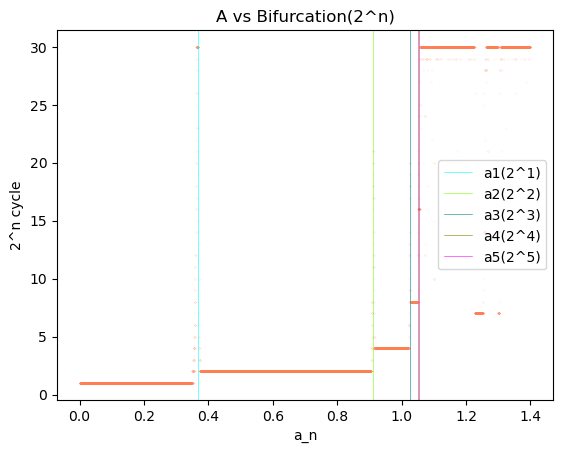

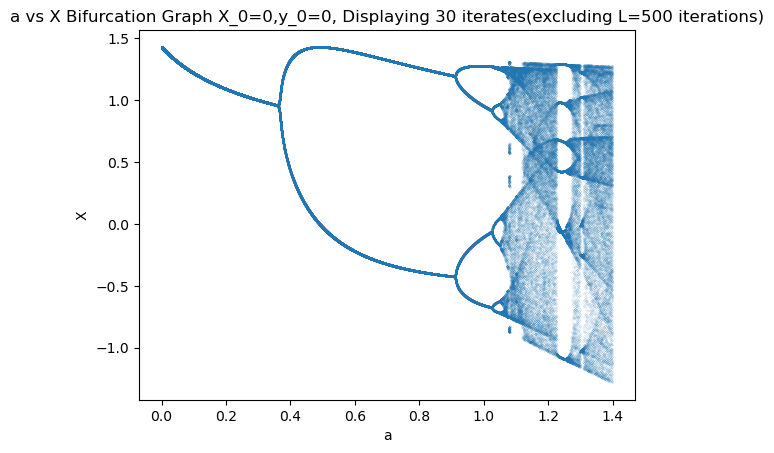

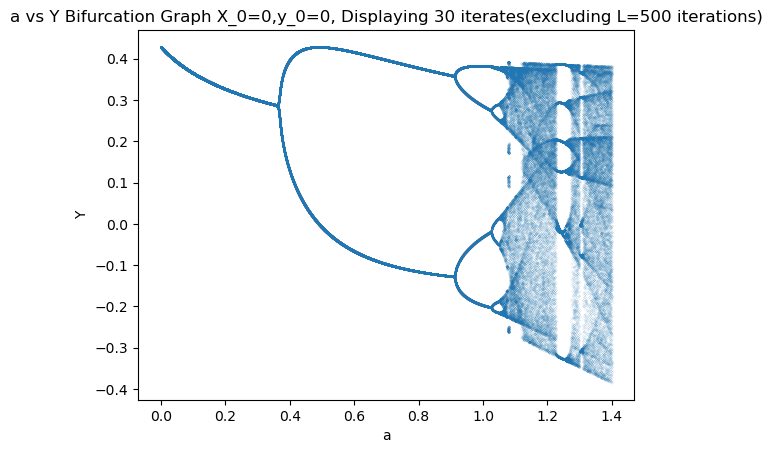

In [249]:
runHenonMap(500,30,10000)

In [247]:
aVals = [.367,.91,1.025,1.05,1.055]
diffList=[]
for i in range(1,len(aVals)-1):
    x_nMinus= aVals[i-1]
    x_n= aVals[i]
    x_nPlus= aVals[i+1]
    diff = calcDiff(x_n,x_nMinus,x_nPlus)
    print("aValues[i] - ", diff)
    diffList.append(diff)


aValues[i] -  4.721739130434788
aValues[i] -  4.59999999999997
aValues[i] -  5.000000000000133
